You own a supermarket mall and there are some basic customer info such as Customer ID, age, gender, annual income and spending score.
Spending score is assigned based on parameters like customer behavior and purchasing data.

We want to analyse the data and understand which are our target customers so we can strategise.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/paramikdasgupta/Desktop/data science/datasets/Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)':'Spending Capability'}, inplace=True)

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Capability
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


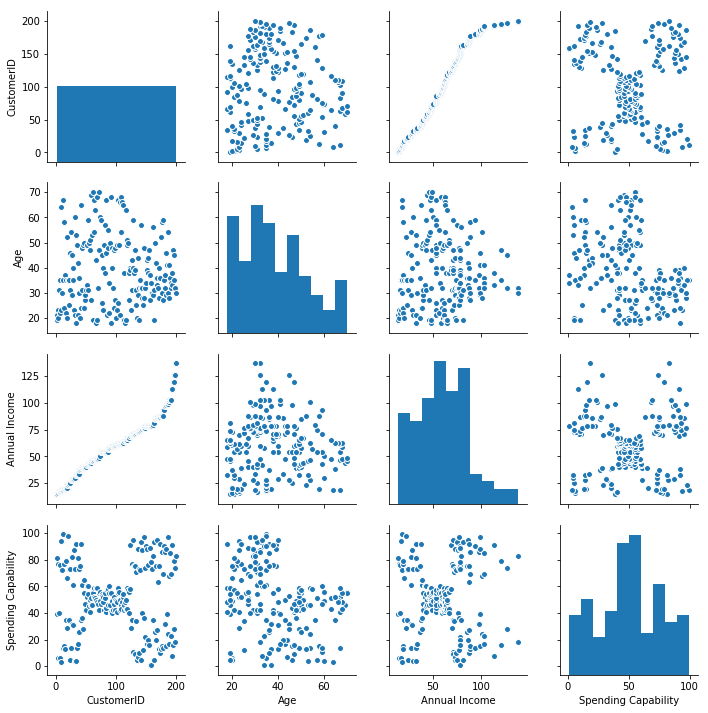

In [16]:
sns.pairplot(df)

In [17]:
df=df.drop(['CustomerID'],axis=1)
df.head()


,Gender,Age,Annual Income,Spending Capability
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


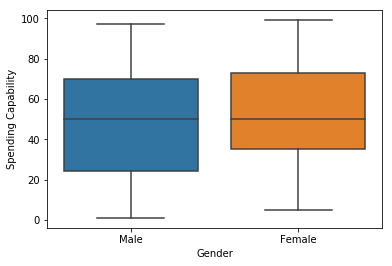

In [18]:
sns.boxplot(df['Gender'],df['Spending Capability'])

It can be observed that the avergae spending capability of female is greater than male.

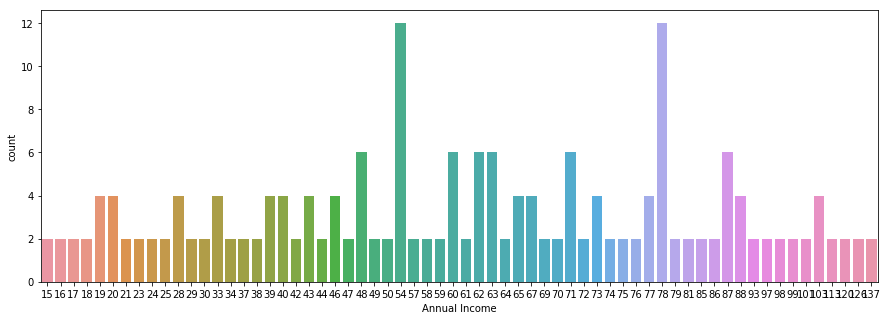

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df['Annual Income'])

It can be observed that people with salary of 54k and 78k visited the mall most.

We will now use dbscan algorithm for the purpose of clustering.It is a great algorithm to automatically remove outliers. It makes cluster based on epsilon, min points and noise.

In [20]:
df.head()

,Gender,Age,Annual Income,Spending Capability
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
x=df.iloc[:,[2,3]].values

In [22]:

x.shape

(200, 2)

In [23]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [26]:
model = db.fit(x)

In [27]:
label=model.labels_

In [28]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [29]:
from sklearn import metrics
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
#calculating the number of clusters
n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No. of clusters:',n_clusters)

No. of clusters: 9


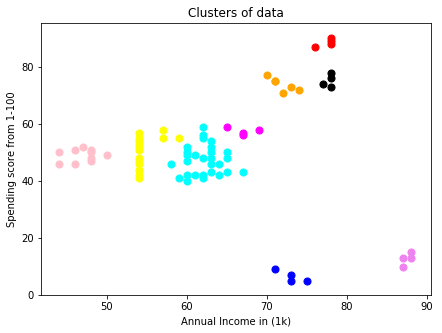

In [30]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s= 50, c= 'pink')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s= 50, c= 'yellow')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s= 50, c= 'cyan')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s= 50, c= 'magenta')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s= 50, c= 'orange')
plt.scatter(x[y_means == 5,0], x[y_means == 5,1], s= 50, c= 'blue')
plt.scatter(x[y_means == 6,0], x[y_means == 6,1], s= 50, c= 'red')
plt.scatter(x[y_means == 7,0], x[y_means == 7,1], s= 50, c= 'black')
plt.scatter(x[y_means == 8,0], x[y_means == 8,1], s= 50, c= 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending score from 1-100')
plt.title('Clusters of data')
plt.show()

By using dbscan, we can find there are 9 clusters, which are denoted by color.